In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
import time

In [2]:
start_time = time.time()

########2D-continuum##########
#We assume it starts from position (0,0) every time and pick random angle for each step.
#Thus for the calculation of square distance each time I just find the 
#length of vector (x,y) an square it. i.e. x^2+y^2

sd_sum = 0
runs = 100000
t=1000
step = 1
for i in range(runs):
    position_x = 0
    position_y = 0
    for j in range(t):
        angle = (random.randint(0,359)/180)*np.pi
        position_x+=round(step*np.cos(angle),2)
        position_y+=round(step*np.sin(angle),2)
    sd_sum+=position_x**2+position_y**2
mean_sd = sd_sum/runs

print(f"The Mean Square Distance is {mean_sd}.")
print(f"Execution Time: {(time.time() - start_time)} seconds.")

The Mean Square Distance is 1010.6369963619916.
Execution Time: 944.0902030467987 seconds.


In [3]:
start_time = time.time()

mean_sd = 0
exps = 10000
t=1000
averages = [0]*10
for i in range(exps):
    position = [0,0]
    points = []
    for j in range(1,t+1):
        angle = (random.randint(0,359)/180)*np.pi
        position[0]+=round(np.cos(angle),2)
        position[1]+=round(np.sin(angle),2)
        if j%100==0:
            points.append(position[0]**2+position[1]**2)
    for j in range(len(points)):
        averages[j]+=points[j]/exps

print(f"The averages is {averages}.")
print(f"Execution Time: {(time.time() - start_time)} seconds.")

The averages is [100.57654437000069, 201.1851447599993, 303.5389468100008, 401.79794846, 504.7531712000021, 608.1276485500018, 709.9648144599994, 810.3674806599992, 913.2772270299982, 1014.3148010699961].
Execution Time: 89.60566568374634 seconds.


(1.016382220047875, -2.2198482893314804)


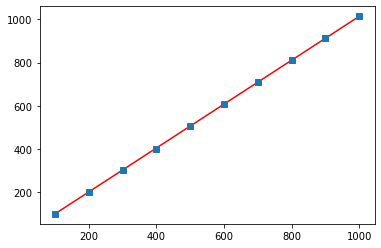

In [4]:
t = np.arange(100,1001,100).reshape(-1,1)
av = np.array(averages)
reg = LinearRegression()
model = reg.fit(t,av)
c = model.intercept_
m = model.coef_[0]
print((m,c))
y = m*t+c
plt.plot(t, y, '-r')
plt.plot(t,av,'s')
plt.show()